# CIFAR10 classification

Here we are going to show the final results on our classification problem.
Let us remind what we have already done
1. Loaded CIFAR10 dataset (see [CIFAR10-visualization.ipynb](CIFAR10-visualization.ipynb))
2. Applied Inception v3 model of CNN (pretrained on [ILSVRC-2012-CLS](http://www.image-net.org/challenges/LSVRC/2012/)) to CIFAR10 images in order to obtain their CNN codes (see [Feature_extraction_using_Inception_v3.ipynb](Feature_extraction_using_Inception_v3.ipynb))
3. Saved the CNN codes in the file <tt>features/CIFAR10_Inception_v3_features.npz</tt>

Lets load the data first.

In [1]:
import numpy as np
import myutils
import matplotlib.pyplot as plt

data = np.load('features/CIFAR10_Inception_v3_features.npz')

X_training = data['features_training']
y_training = data['labels_training']

X_testing = data['features_testing']
y_testing = data['labels_testing']

# data_training, data_testing = myutils.load_CIFAR_dataset(shuffle=False)
# assert( (np.array( [data_training[i][1] for i in range(len(data_training))] ) == y_training).all() )
# assert( (np.array( [data_testing[i][1] for i in range(len(data_testing))] ) == y_testing).all() )
print( 'X_training size = {}'.format(X_training.shape))

X_training size = (50000, 2048)


## LinearSVC classifier from scikit-learn

We used the linear classifier from the [scikit-learn](http://scikit-learn.org) library.<br/>
More precisely, we used <tt>[LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)</tt>

In [2]:
from sklearn.svm import LinearSVC

# C - chosen experimentally (see explanation below)
C = 0.1
clf = LinearSVC(C=C)

In [3]:
# Warning: training process may take some time
clf.fit(X_training, y_training)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [4]:
print( 'Classification score = ', clf.score( X_testing, y_testing ) )

Classification score =  0.896


So we obtained **89.60%** score with simply linear classifier.

In [125]:
y_predictions = clf.predict( X_testing )

### Some misclassifications

In [126]:
from sklearn.metrics import confusion_matrix
labels = myutils.load_CIFAR_classnames()
conf_matrix = confusion_matrix( y_testing, y_predictions )

print( 'Confusion matrix:\n', conf_matrix )
print( labels )

Confusion matrix:
 [[901   7  17   8   5   0   2   3  43  14]
 [  8 945   4   3   0   1   1   1   6  31]
 [ 22   1 876  30  28  14  18   9   1   1]
 [  6   6  21 796  30  94  20  14  10   3]
 [  4   1  21  28 880   9  24  28   4   1]
 [  6   0  13  76  19 854  11  18   2   1]
 [  3   1  27  20  15  10 918   2   3   1]
 [  6   0   8  17  27  22   4 911   2   3]
 [ 31   6   2   5   2   2   2   1 941   8]
 [ 12  33   3   0   1   2   1   1   9 938]]
['plane', 'auto', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [127]:
i,j = 3,0
img_idx = [ k for k in range(10000) if y_testing[k]==i and y_predictions[k]==j ]  
print( 'We have, e.g., {c} {iname}s predicted to be {jname}'.format(\
       c=conf_matrix[i,j], iname=labels[i], jname=labels[j]) )
# print(img_idx)

So we have, e.g., 6 cats predicted to be plane


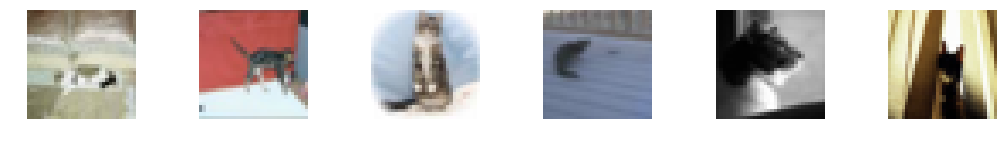

In [128]:
_, data_testing = myutils.load_CIFAR_dataset(shuffle=False)
from matplotlib import pyplot as plt
%matplotlib inline 

fig = plt.figure(figsize=(18,2));
for _i in range(conf_matrix[i,j]):
    a=fig.add_subplot(1,conf_matrix[i,j],_i+1)
    plt.imshow(data_testing[img_idx[_i]][0])
    plt.axis('off')

### Saving parameters
We simply save the matrix with weights and bias vector for linear classifier.

In [124]:
# np.savez_compressed("classifiers/8960_Inception_v3_LinearSVC.npz",W=np.array(clf.coef_).T, b=clf.intercept_)

## k-nearest neighbors classifier

Let us note that simple [kNN classifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
(with k=10), trained with 5000 training features (CNN codes) gives **83.45%** accuracy on whole 10000 testing images.

Remark that computing predictions with this classifier is very complex and it is not recommended for classificcation of images.

Here is the code to compute the score on testing dataset.
```python
from sklearn.neighbors import KNeighborsClassifier
kNN_clf = KNeighborsClassifier(n_neighbors=10)
kNN_clf.fit(X_training, y_training)
print( 'Classification score = ', kNN_clf.score( X_testing, y_testing ) )
# Classification score =  0.8345
```

## Logistic regression

Finally we used <tt>[Logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)</tt> with default parameters. We trained the model with all the training data and obtained **89.62%** accuracy on testing dataset.
```python
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_training, y_training)
print( 'Classification score = ', clf.score( X_testing, y_testing ) )
# Classification score =  0.8962
```
See [Classification_using_CNN_codes-LogisticRegression.ipynb](Classification_using_CNN_codes-LogisticRegression.ipynb) for deails.